In [42]:
from sklearn import datasets
import pandas as pd

In [43]:
data = datasets.load_iris()

In [44]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [45]:
data_df = pd.DataFrame(data.data,columns = data.feature_names)
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
data_df['target'] = data.target
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
replacement_map = {0 : data.target_names[0],1:data.target_names[1],2 : data.target_names[2]}

data_df['target'] = data_df['target'].replace(replacement_map)

data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = data_df.drop('target',axis = 1)
y = pd.DataFrame(data.target)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [51]:
len(X_train)

120

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier(n_estimators = 6)

In [60]:
model.fit(X_train,y_train)

model.score(X_test,y_test)

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9666666666666667

In [61]:
y_predicted = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [65]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

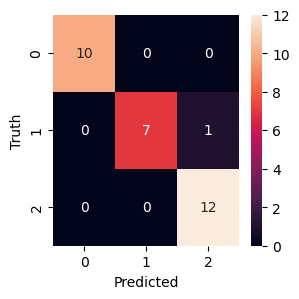

In [71]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize =(3,3))

sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel("Truth")

